#  Predicting the closing price stock price of APPLE inc:

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd  # for reading the data
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader

# For time stamps
from datetime import datetime

In [2]:
datetime.now()

datetime.datetime(2021, 10, 26, 14, 34, 20, 754150)

In [3]:
#Get the stock quote
#df = DataReader('AAPL', data_source='yahoo', start='2012-01-01', end=datetime.now())
#Show teh data
#df

In [4]:
df = pd.read_csv('AAPL_10_08_2021.csv',parse_dates=True,index_col='Date')

In [5]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.610315,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.678085,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.818838,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.952841,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.932299,394024400


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2416 entries, 2012-01-03 to 2021-08-09
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2416 non-null   float64
 1   High       2416 non-null   float64
 2   Low        2416 non-null   float64
 3   Close      2416 non-null   float64
 4   Adj Close  2416 non-null   float64
 5   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 132.1 KB


### Check Whether there are any Missing Values 

- Missing data, also known as missing values, is where some of the observations in a data set are blank. 

In [7]:
df.isnull().sum()  # to get the count of the missing values 

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

### Inference:

- As we can see `High`,`Low`,`Open`,`Close`,`Volume`,`Adj Close` Don't have any missing Vlaues 

In [8]:
Dates =pd.to_datetime(df.index)  # convert index column to datetime format

In [9]:
print(Dates)

DatetimeIndex(['2012-01-03', '2012-01-04', '2012-01-05', '2012-01-06',
               '2012-01-09', '2012-01-10', '2012-01-11', '2012-01-12',
               '2012-01-13', '2012-01-17',
               ...
               '2021-07-27', '2021-07-28', '2021-07-29', '2021-07-30',
               '2021-08-02', '2021-08-03', '2021-08-04', '2021-08-05',
               '2021-08-06', '2021-08-09'],
              dtype='datetime64[ns]', name='Date', length=2416, freq=None)


In [10]:
Dates.year.unique()

Int64Index([2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021], dtype='int64', name='Date')

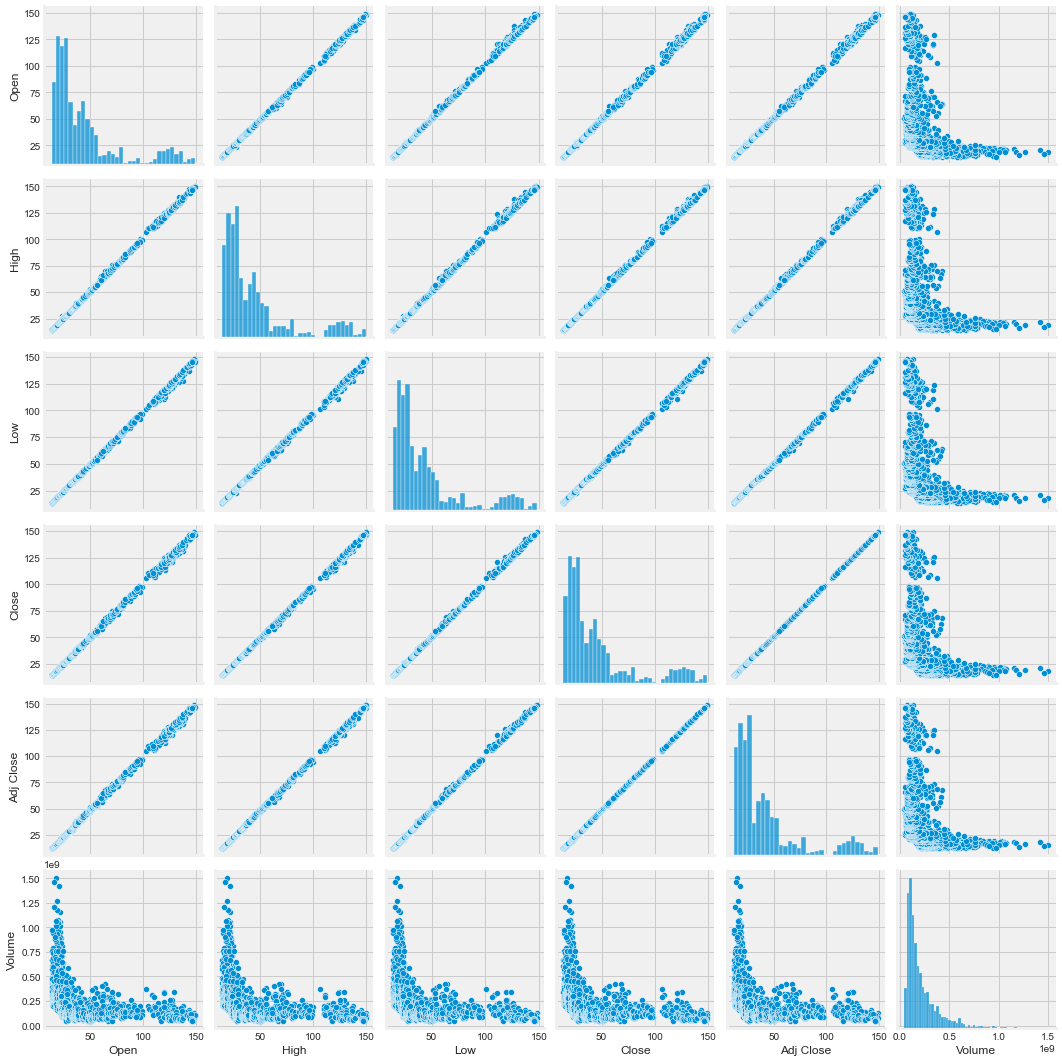

In [11]:
sns.pairplot(df)

In [12]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.610315,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.678085,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.818838,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.952841,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.932299,394024400
...,...,...,...,...,...,...
2021-08-03,145.809998,148.039993,145.179993,147.360001,147.139542,64786600
2021-08-04,147.270004,147.789993,146.279999,146.949997,146.730164,56368300
2021-08-05,146.979996,147.839996,146.169998,147.059998,146.839996,46397700


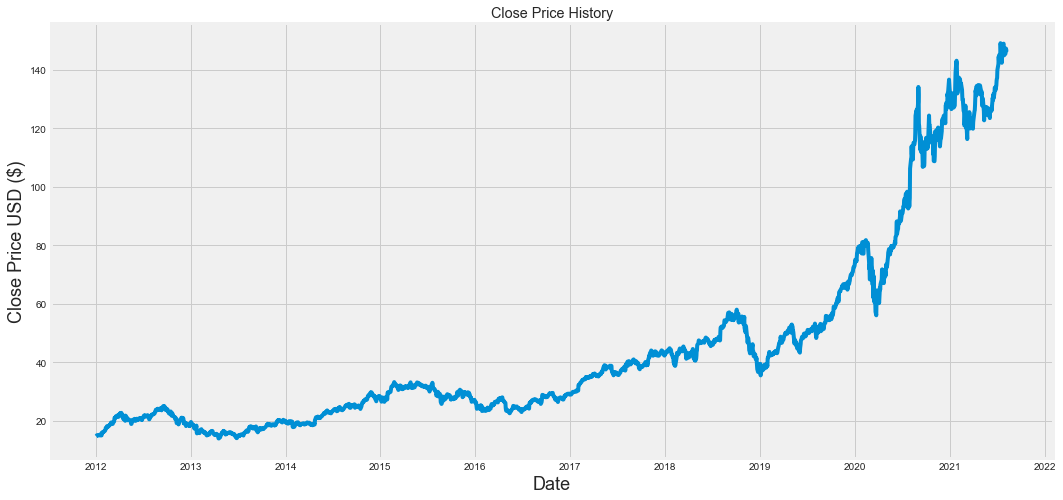

In [13]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [14]:
len(df)  # the dataset has  days stock prices 

2416

In [15]:
#Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .8 ))   ## keeping 80% of data for training

training_data_len

1933

In [16]:
data.describe()

,Close
count,2416.000000
mean,44.633737
std,32.750046
min,13.947500
25%,23.393124
50%,31.650000
75%,50.665625
max,149.149994


In [17]:
data.Close.describe()

count    2416.000000
mean       44.633737
std        32.750046
min        13.947500
25%        23.393124
50%        31.650000
75%        50.665625
max       149.149994
Name: Close, dtype: float64

In [18]:
(14.765714-13.947500)/(149.149994-13.947500)

0.006051767062817638

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
x = MinMaxScaler(feature_range=(0,1))

In [21]:
x.fit_transform([[14.68]])

array([[0.]])

In [22]:
#Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00546799],
       [0.00605177],
       [0.00726424],
       ...,
       [0.98454173],
       [0.97773713],
       [0.9773673 ]])

In [23]:
scaled_data[0:10]

array([[0.00546799],
       [0.00605177],
       [0.00726424],
       [0.00841859],
       [0.00824161],
       [0.00864048],
       [0.00845821],
       [0.00815179],
       [0.00773443],
       [0.00902614]])

In [24]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]      # row 0 to row 1901 stored as training data
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00546799, 0.00605177, 0.00726424, 0.00841859, 0.00824161,
       0.00864048, 0.00845821, 0.00815179, 0.00773443, 0.00902614,
       0.01019106, 0.00983182, 0.00786386, 0.009742  , 0.00789292,
       0.01482697, 0.01429073, 0.01499074, 0.01650434, 0.01742095,
       0.01734435, 0.01706171, 0.01826625, 0.01939946, 0.02068326,
       0.02275687, 0.02711277, 0.02717881, 0.02960375, 0.03141584,
       0.02830147, 0.02950072, 0.02947696, 0.03283964, 0.03236151,
       0.03324642, 0.03483663, 0.03572155, 0.03827064, 0.04012763,
       0.04066387, 0.04085143, 0.0376763 , 0.03691024, 0.03702384,
       0.04000878, 0.04084879, 0.04265296, 0.04690584, 0.05257987,
       0.05151796, 0.0515206 , 0.05562292, 0.05690672, 0.05599273,
       0.05515801, 0.05428894, 0.05717613, 0.0591573 , 0.05998675])]
[0.05793690462544279]

[array([0.00546799, 0.00605177, 0.00726424, 0.00841859, 0.00824161,
       0.00864048, 0.00845821, 0.00815179, 0.00773443, 0.00902614,
       0.01019106, 0.00983182, 0.00

In [25]:
x_train.shape

(1873, 60, 1)

## Build The LSTM Model

In [26]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

#Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

#Train the model


### Train the Model 

In [27]:
model.fit(x_train, y_train, batch_size=2, epochs=1)

937/937 [==============================] - 45s 44ms/step - loss: 2.4503e-04


In [28]:
### Evaluation

In [29]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    


In [30]:
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))



In [31]:
np.set_printoptions(suppress=True)

In [32]:
df.iloc[1843]

Open         5.246000e+01
High         5.316250e+01
Low          5.203250e+01
Close        5.228750e+01
Adj Close    5.105162e+01
Volume       1.279852e+08
Name: 2019-05-02 00:00:00, dtype: float64

### Prediction 

In [33]:
# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

3.618017950356587

In [34]:
len(predictions)

483

### Visualisation of Output

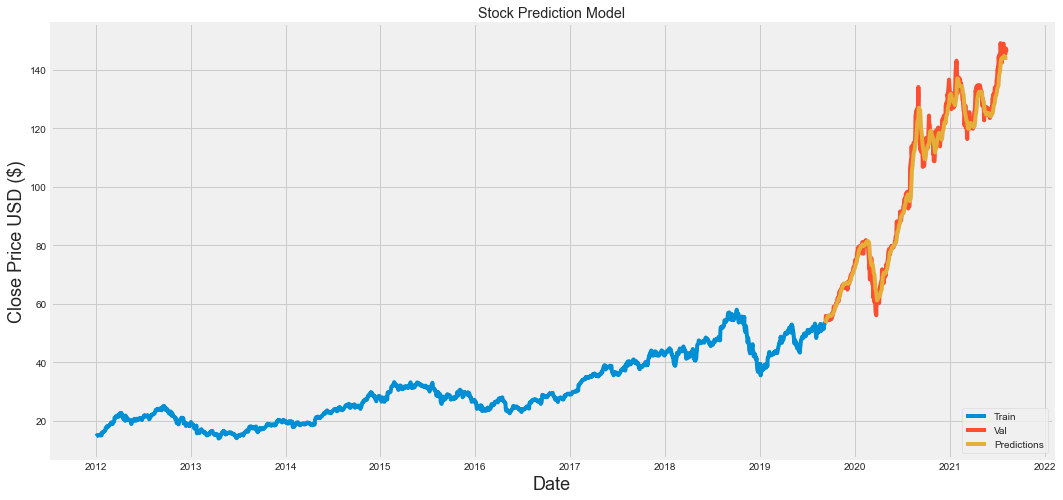

In [35]:
# Plot the data
train = data.iloc[:training_data_len]
valid = data.iloc[training_data_len:]
valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Stock Prediction Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

### Predictions

In [36]:
#Show the valid and predicted prices
valid[-1:-10:-1]

,Close,Predictions
Date,,
2021-08-09,146.089996,144.251816
2021-08-06,146.139999,144.237579
2021-08-05,147.059998,144.131454
2021-08-04,146.949997,144.066772
2021-08-03,147.360001,144.064743
2021-08-02,145.520004,144.283249
2021-07-30,145.860001,144.484619
2021-07-29,145.639999,144.684753
2021-07-28,144.979996,144.804779


### Get the last 60 Days stock Price from the dataset 

In [37]:
arr  = x_test[-1][1:]

In [38]:
arr.shape

(59, 1)

In [39]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-08-03,145.809998,148.039993,145.179993,147.360001,147.139542,64786600
2021-08-04,147.270004,147.789993,146.279999,146.949997,146.730164,56368300
2021-08-05,146.979996,147.839996,146.169998,147.059998,146.839996,46397700
2021-08-06,146.350006,147.110001,145.630005,146.139999,146.139999,54067400
2021-08-09,146.199997,146.699997,145.520004,146.089996,146.089996,48853100


In [142]:
scaled = arr[58][0]

In [143]:
scaler.inverse_transform([[arr[58][0]]])

array([[146.139999]])

### Get todays stock price and convert it to scaled value

In [144]:
today = df.iloc[-1]['Close']

In [145]:
print(f"todays stock price is {today}")

todays stock price is 146.089996


## scale it 

In [146]:
scale_today = scaler.transform([[today]])

## add the scaled value to array 

In [147]:
arr3 = np.append(arr,scale_today ,axis = 0)

In [148]:
arr3.shape          ## we can see we have 60 values 

(60, 1)

### Output of LSTM to Predict Tommorows Stock Price


### Get the prediction 

In [149]:
prediction_tommorow = model.predict(arr3.reshape(1,60,1))

In [150]:
price = scaler.inverse_transform(prediction_tommorow)

In [151]:
print(f"Prediction for tommorow is {price[0][0]} $")

Prediction for tommorow is 147.2698516845703 $
